In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import numpy as np
import psycopg2
from IPython.display import display

%matplotlib inline

In [39]:
def makePlot(dfM, dfF, plotName):
    plt.plot(dfM["year"], dfM["count"], "bp-", label="Male")
    plt.plot(dfF["year"], dfF["count"], "mp-", label="Female")
    plt.title(plotName)
    plt.legend()
    plt.xlabel("Year")
    plt.ylabel("Count")
    #plt.savefig(plotName + "Plot")
    plt.show()

In [53]:
def buildQuery(name):
    queryM = "SELECT year, count FROM babynames WHERE name LIKE '" + name + "' AND gender = 'M'"
    queryF = "SELECT year, count FROM babynames WHERE name LIKE '" + name + "' AND gender = 'F'"
    return queryM, queryF

In [29]:
dbinfo = {
    'host' : 'flowers.mines.edu',
    'user' : 'dkern',
    'password' : 'SometimesIEatBananas',
    'database' : 'csci403'
}

try:
    db = psycopg2.connect(**dbinfo)
    cursor = db.cursor()
except psycopg2.Error as e:
    print(e)

In [56]:
keanuMquery, keanuFquery = buildQuery("Keanu")
cursor.execute(keanuMquery)
keanuMCounts = pd.DataFrame(cursor.fetchall(), columns=[r[0] for r in cursor.description])
cursor.execute(keanuFquery)
keanuFCounts = pd.DataFrame(cursor.fetchall(), columns=[r[0] for r in cursor.description])
#display(keanuCounts)

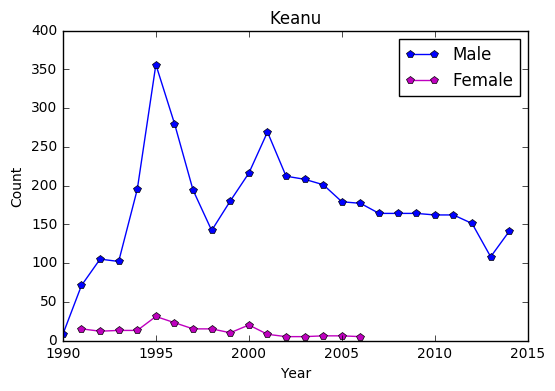

In [57]:
makePlot(keanuMCounts, keanuFCounts, "Keanu")

In [58]:
FarrahMquery, FarrahFquery = buildQuery("Farrah")
cursor.execute(FarrahMquery)
FarrahMCounts = pd.DataFrame(cursor.fetchall(), columns=[r[0] for r in cursor.description])
cursor.execute(FarrahFquery)
FarrahFCounts = pd.DataFrame(cursor.fetchall(), columns=[r[0] for r in cursor.description])

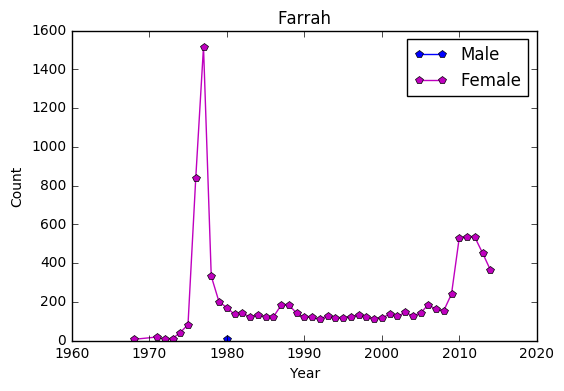

In [59]:
makePlot(FarrahMCounts, FarrahFCounts, "Farrah")

In [27]:
cursor.close()
db.close()